In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
df.sample(5)

,v1,v2
5055,ham,Goodnight da thangam I really miss u dear.
5357,ham,Ok
4633,ham,These won't do. Have to move on to morphine
5514,ham,Oh... Okie lor...We go on sat...
1932,ham,Jus finished avatar nigro


In [8]:
df = df.rename(columns={'v1':'target','v2':'text'})

In [9]:
df.sample(5)

,target,text
2009,ham,I can't keep going through this. It was never ...
5360,ham,"Hey, iouri gave me your number, I'm wylie, rya..."
627,ham,Yup i thk they r e teacher said that will make...
3881,ham,Short But Cute: \Be a good person
1735,ham,Why tired what special there you had


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [18]:
# 0 = ham
# 1 = spma
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

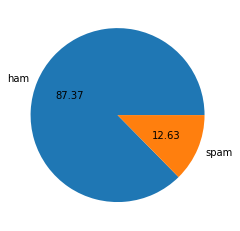

In [19]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df.text.apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# number of sentence
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## 3. Data Preprocessing

In [28]:
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords

ps = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #Removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Removing Stopwords and Punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
            
    return ' '.join(y) 

In [30]:
df['transformed_text'] = df['text'].apply(transform_text)

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
from collections import Counter

In [33]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [34]:
len(spam_corpus)

9939

In [35]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [36]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [37]:
len(ham_corpus)

35394

In [38]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

## 4. Model Building

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [53]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
x.shape

(5169, 3000)

In [55]:
y = df['target'].values

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [57]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [58]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(x_train,y_train)
pred1 = gnb.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred1))
print('Confusion Metrix: ',confusion_matrix(y_test,pred1))
print('Precision: ',precision_score(y_test,pred1))

Accuracy:  0.8694390715667312
Confusion Metrix:  [[788 108]
 [ 27 111]]
Precision:  0.5068493150684932


In [60]:
bnb.fit(x_train,y_train)
pred2 = bnb.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred2))
print('Confusion Metrix: ',confusion_matrix(y_test,pred2))
print('Precision: ',precision_score(y_test,pred2))

Accuracy:  0.9835589941972921
Confusion Metrix:  [[895   1]
 [ 16 122]]
Precision:  0.991869918699187


In [61]:
mnb.fit(x_train,y_train)
pred3 = mnb.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred3))
print('Confusion Metrix: ',confusion_matrix(y_test,pred3))
print('Precision: ',precision_score(y_test,pred3))

Accuracy:  0.9709864603481625
Confusion Metrix:  [[896   0]
 [ 30 108]]
Precision:  1.0


In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))